# Biased and Unbiased Fractals

Playing around.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [36]:
def random_walk(bias=0.0):
    p_right = 0.5 + bias
    p_left = 1 - p_right

    x = [0]

    for i in range(1, 100):
        step = np.random.choice([-1, 1], p=[p_left, p_right])
        x.append(x[-1] + step)

    return x

def random_walk_only_last(bias=0.0, time=100):
    p_right = 0.5 + bias
    p_left = 1 - p_right
    position = 0
    for i in range(1, time):
        step = np.random.choice([-1, 1], p=[p_left, p_right])
        position += step

    return position

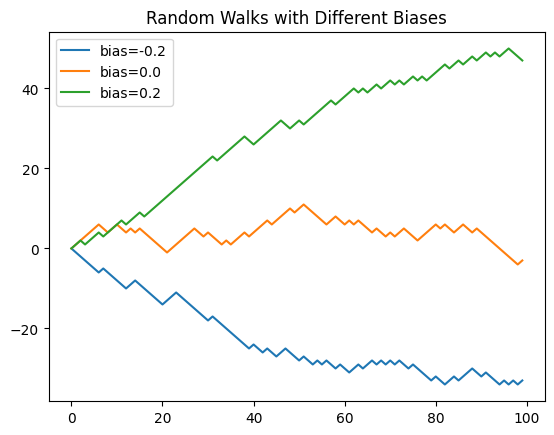

In [6]:
for bias in [-0.2, 0.0, 0.2]:
    walk = random_walk(bias=bias)
    plt.plot(walk, label=f'bias={bias}')
    plt.legend()
    plt.title('Random Walks with Different Biases')

exponent =  0.9445505247111408


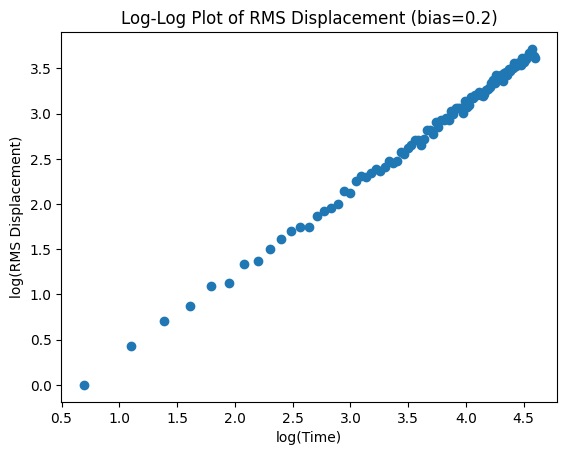

In [45]:
def find_slope(bias, time_range=100, N=100):
    x_meansquare = []
    t = []
    
    for time in range(1, time_range):
        t.append(time)
        x_square = 0.0
        for _ in range(N):
            ind = random_walk_only_last(bias=bias, time=time)
            x_square += (ind)**2
        x_meansquare.append(x_square / N)
        

    x_rms = np.sqrt(x_meansquare)
    log_x_rms = np.log(x_rms[1:])
    log_t = np.log(t[1:])

    plt.scatter(log_t, log_x_rms)
    plt.title(f'Log-Log Plot of RMS Displacement (bias={bias})')
    plt.xlabel('log(Time)')
    plt.ylabel('log(RMS Displacement)')
    slope, intercept, r, p, std_err = stats.linregress(log_t, log_x_rms)
    return slope

print('exponent = ', find_slope(bias=0.2, time_range=100, N=100))